In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#panggil dataset ke dataframe
df = pd.read_csv('breastcancer.csv')
pd.set_option('display.max_columns', 33)

###DATA PREPROCESSING & EXPLORATORY DATA ANALYSIS


In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# dimensi data
df.shape

(569, 33)

In [ ]:
# list semua variabel dan data type-nya
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Mengubah tipe data diagnosis menjadi int
df['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)

In [ ]:
# Menghapus kolom 'id' dan 'Unnamed: 32' karena tidak dibutuhkan dalam analisis
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Mengecek apakah ada duplikasi data
df.duplicated().sum()

0

In [ ]:
# Melakukan analisis deskriptif pada data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


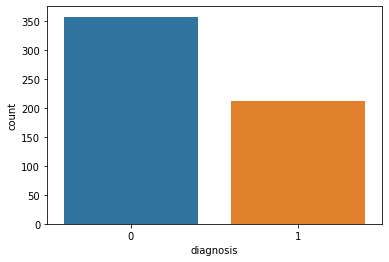

In [ ]:
sns.countplot(x='diagnosis', data=df)

1 = Malignant (ganas)

0 = Benign (jinak)


---


Berdasarkan grafik di atas, dapat diketahui bahwa jumlah pasien dengan tumor payudara jinak lebih banyak dibanding dengan pasian dengan tumor payudara ganas

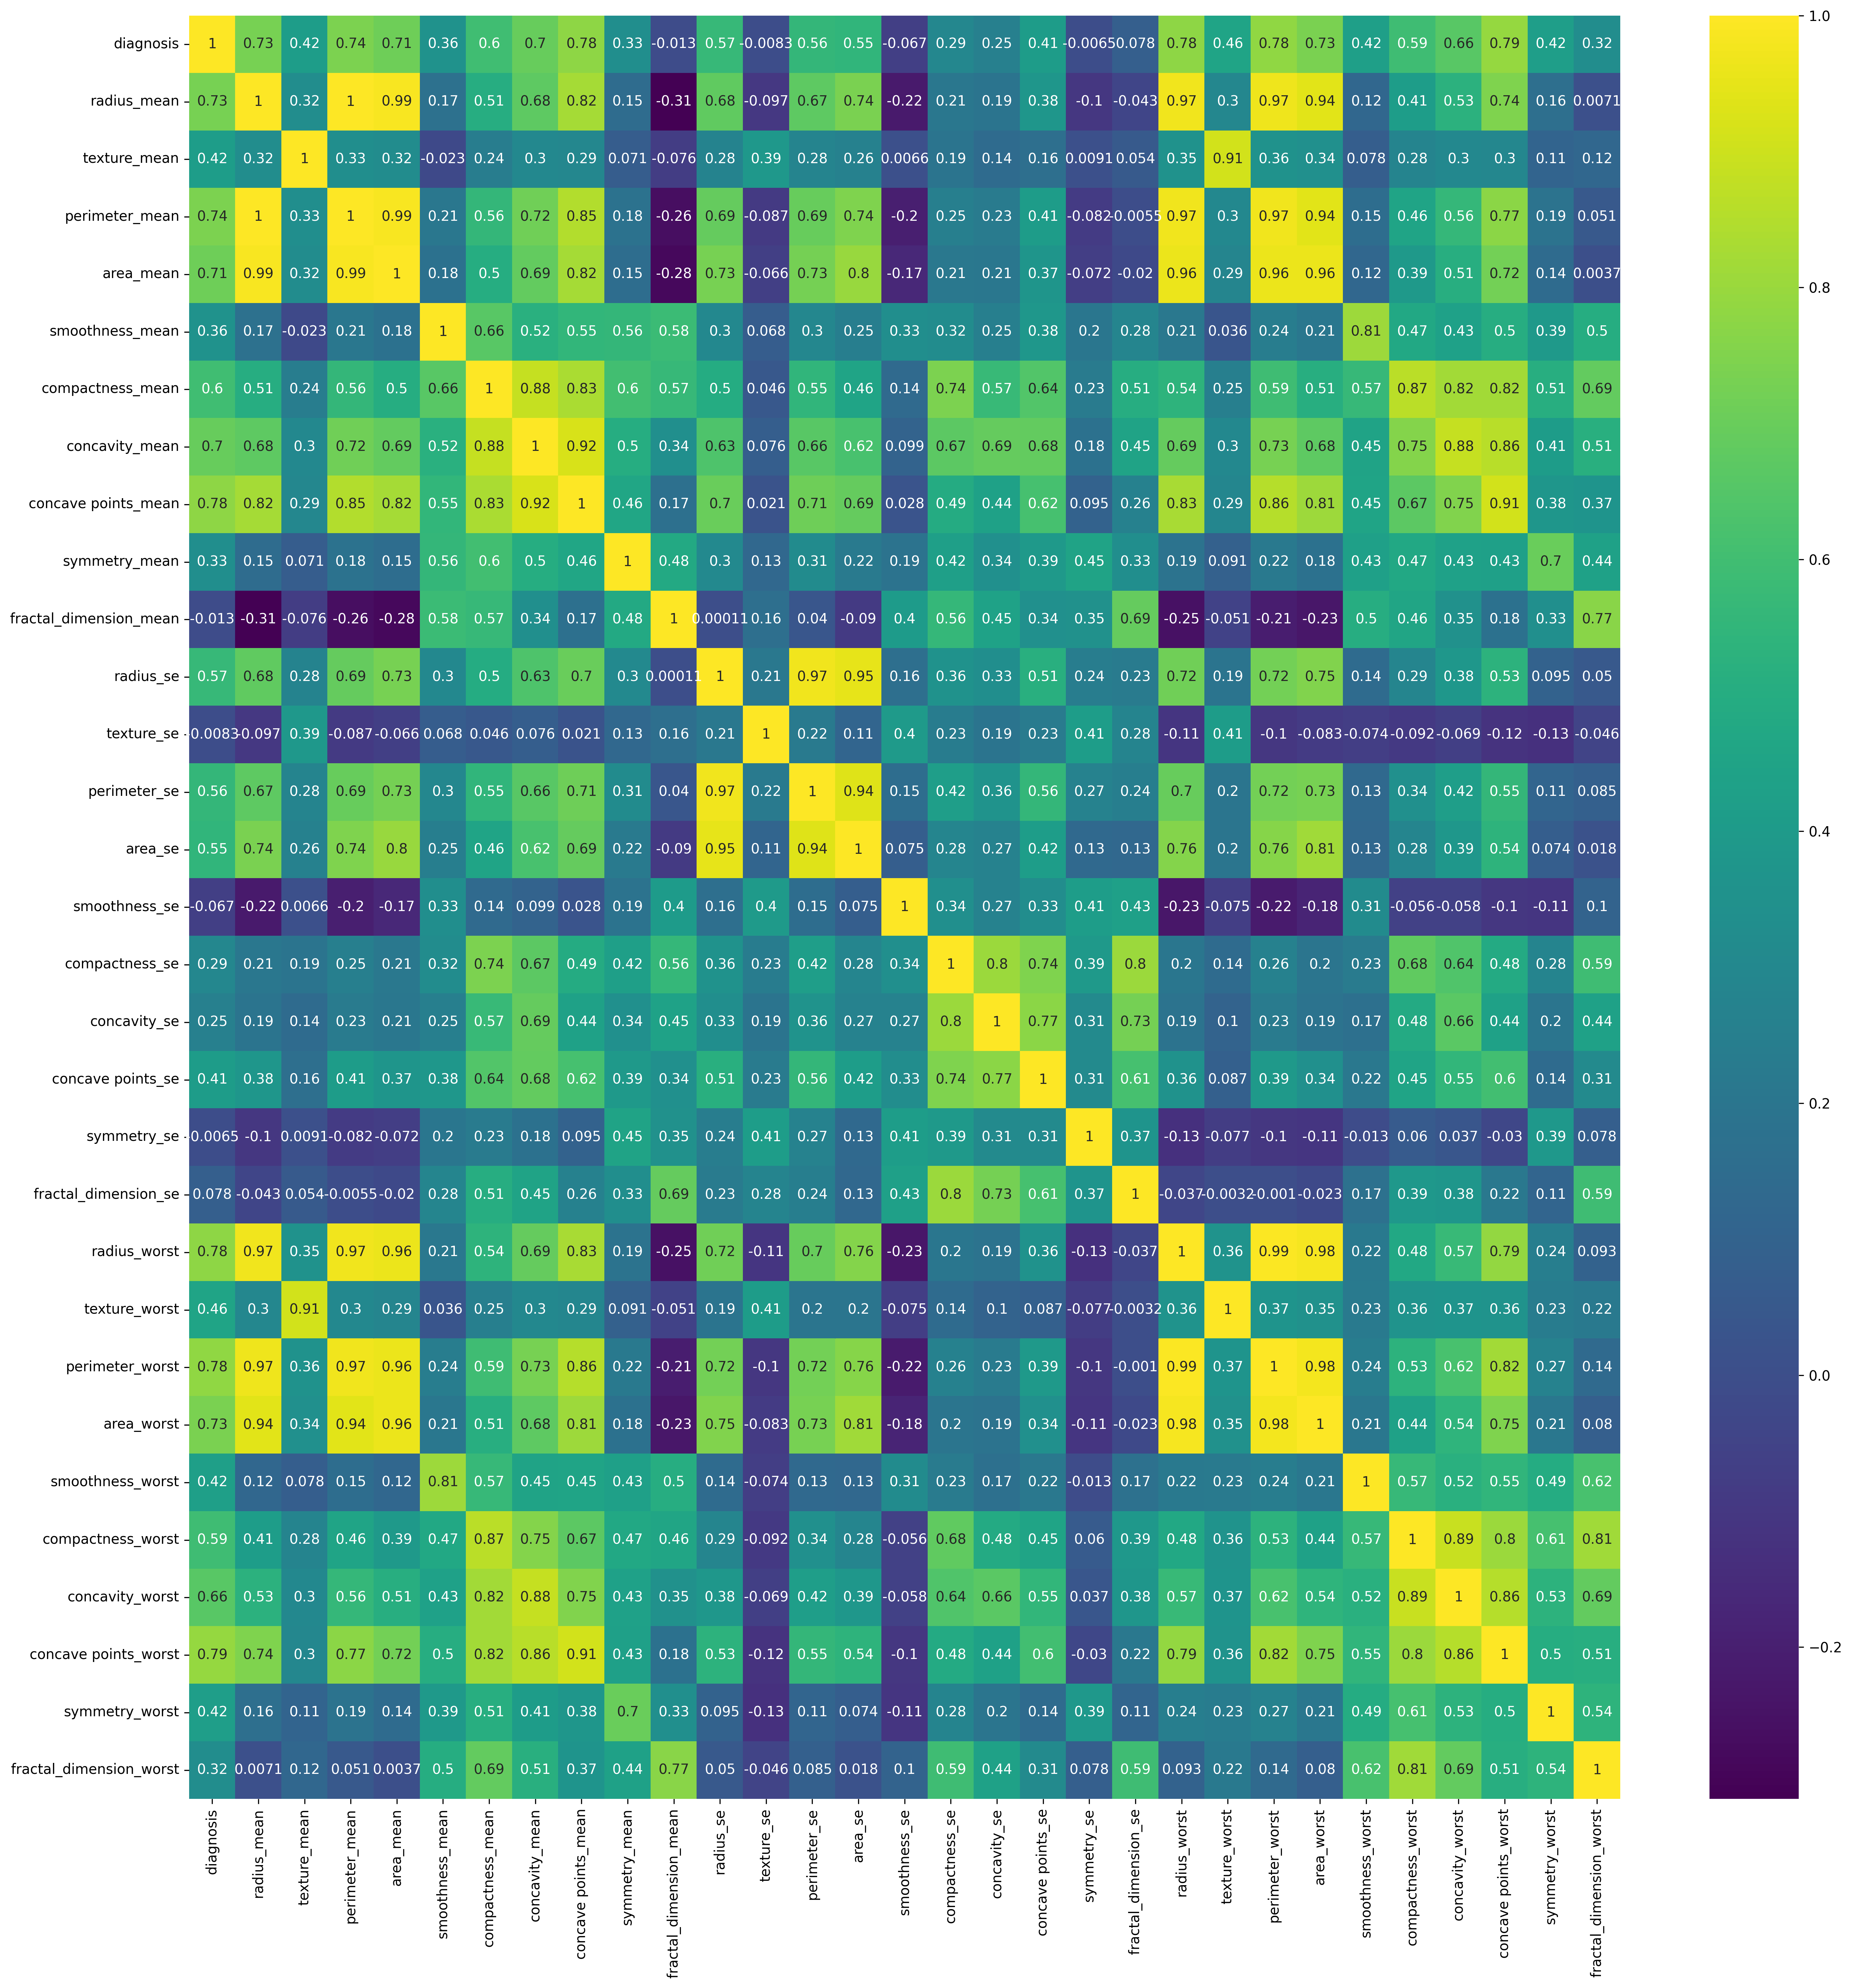

In [ ]:
# Correlation matrix
plt.figure(figsize=(20,20), dpi=300, tight_layout=True)
sns.heatmap(df.corr(), annot=True, cmap="viridis")

In [ ]:
# Korelasi masing-masing variabel dengan variabel 'diagnosis'
correlations = df.corr()['diagnosis'].sort_values(ascending=False).round(2)
correlations

diagnosis                  1.00
concave points_worst       0.79
perimeter_worst            0.78
concave points_mean        0.78
radius_worst               0.78
perimeter_mean             0.74
area_worst                 0.73
radius_mean                0.73
area_mean                  0.71
concavity_mean             0.70
concavity_worst            0.66
compactness_mean           0.60
compactness_worst          0.59
radius_se                  0.57
perimeter_se               0.56
area_se                    0.55
texture_worst              0.46
smoothness_worst           0.42
symmetry_worst             0.42
texture_mean               0.42
concave points_se          0.41
smoothness_mean            0.36
symmetry_mean              0.33
fractal_dimension_worst    0.32
compactness_se             0.29
concavity_se               0.25
fractal_dimension_se       0.08
symmetry_se               -0.01
texture_se                -0.01
fractal_dimension_mean    -0.01
smoothness_se             -0.07
Name: di

In [ ]:
#normalized dataset
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
col = df.columns
df[col] = pd.DataFrame(scaler.fit_transform(df[col]))
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [ ]:
#nilai quartil pada data train
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

#definisikan fungsi untuk mengecek outlier
def outlier_detect(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    return df[((df[col] < (q1_col - 1.5 * iqr_col)) |(df[col] > (q3_col + 1.5 * iqr_col)))]

# ----------------------------------------------------------
def lower_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = df[(df[col] < (q1_col - 1.5 * iqr_col))]
    return lower

# ----------------------------------------------------------
def upper_outlier(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = df[(df[col] > (q3_col + 1.5 * iqr_col))]
    return upper

In [ ]:
#mengecek jumlah outlier pada setiap variabel numeric
col_names = df.columns
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(outlier_detect(df,col_names[i]).shape[0])))

diagnosis: 0
radius_mean: 14
texture_mean: 7
perimeter_mean: 13
area_mean: 25
smoothness_mean: 6
compactness_mean: 16
concavity_mean: 18
concave points_mean: 10
symmetry_mean: 15
fractal_dimension_mean: 15
radius_se: 38
texture_se: 20
perimeter_se: 38
area_se: 65
smoothness_se: 30
compactness_se: 28
concavity_se: 22
concave points_se: 19
symmetry_se: 27
fractal_dimension_se: 28
radius_worst: 17
texture_worst: 5
perimeter_worst: 15
area_worst: 35
smoothness_worst: 7
compactness_worst: 16
concavity_worst: 12
concave points_worst: 0
symmetry_worst: 23
fractal_dimension_worst: 24


In [ ]:
#mendefinisikan fungsi untuk mereplace/mengganti nilai upper outlier menjadi nilai maksimum
def replace_upper(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    upper = q3_col + 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x < (upper)))
    df[col] = df[col].replace(upper)

#memanggil fungsi replace upper outlier untuk setiap variabel numerik
for i in range(len(col_names)):
    replace_upper(df, col_names[i])

In [ ]:
#mendefinisikan fungsi untuk mereplace/mengganti nilai lower outlier menjadi nilai minimum
def replace_lower(df, col):
    q1_col = Q1[col]
    iqr_col = IQR[col]
    q3_col = Q3[col]
    lower = q1_col - 1.5 * iqr_col
    df[col] = df[col].where(lambda x: (x > (lower)))
    df[col] = df[col].replace(lower)

#memanggil fungsi replace lower outlier untuk setiap variabel numerik
for i in range(len(col_names)):
    replace_lower(df, col_names[i])

In [ ]:
#mengecek jumlah outlier untuk setiap variabel numerik setelah replace outlier
for i in range(len(col_names)):
    print("{}: {}".format(col_names[i],(outlier_detect(df,col_names[i]).shape[0])))

diagnosis: 0
radius_mean: 0
texture_mean: 0
perimeter_mean: 0
area_mean: 0
smoothness_mean: 0
compactness_mean: 0
concavity_mean: 0
concave points_mean: 0
symmetry_mean: 0
fractal_dimension_mean: 0
radius_se: 0
texture_se: 0
perimeter_se: 0
area_se: 0
smoothness_se: 0
compactness_se: 0
concavity_se: 0
concave points_se: 0
symmetry_se: 0
fractal_dimension_se: 0
radius_worst: 0
texture_worst: 0
perimeter_worst: 0
area_worst: 0
smoothness_worst: 0
compactness_worst: 0
concavity_worst: 0
concave points_worst: 0
symmetry_worst: 0
fractal_dimension_worst: 0


In [ ]:
#mengecek jumlah nilai null pada variabel kategorik setelah handling missing value
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#mendefinisikan fungsi untuk handling missing value menjadi nilai modus
def replace_mode(df, col):
    df[col] = df[col].fillna(df[col].mode()[0])
    print("NaN in {} raplaced with {}".format(col, df[col].mode()[0]))

#handling missing value variabel kategorik menggunakan modus
for i in range(len(col_names)):
    replace_mode(df, col_names[i])

NaN in diagnosis raplaced with 0.0
NaN in radius_mean raplaced with 0.2536324482938142
NaN in texture_mean raplaced with 0.17653026716266484
NaN in perimeter_mean raplaced with 0.2682606592495336
NaN in area_mean raplaced with 0.15639448568398728
NaN in smoothness_mean raplaced with 0.43396226415094347
NaN in compactness_mean raplaced with 0.29237470093859275
NaN in concavity_mean raplaced with 0.0
NaN in concave points_mean raplaced with 0.0
NaN in symmetry_mean raplaced with 0.27323232323232327
NaN in fractal_dimension_mean raplaced with 0.14132266217354683
NaN in radius_se raplaced with 0.039435089625203694
NaN in texture_se raplaced with 0.10959600424328146
NaN in perimeter_se raplaced with 0.04810818451679782
NaN in area_se raplaced with 0.018375115334760307
NaN in smoothness_se raplaced with 0.11445762654247543
NaN in compactness_se raplaced with 0.06600174242196655
NaN in concavity_se raplaced with 0.0
NaN in concave points_se raplaced with 0.0
NaN in symmetry_se raplaced with 0

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.292375,0.000000,0.731113,0.686364,0.605518,0.039435,0.120469,0.048108,0.018375,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.024381,0.601136,0.117696,0.568610,0.912027,0.130298,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.024381,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.018375,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.433962,0.292375,0.565604,0.522863,0.273232,0.141323,0.139091,0.175875,0.126655,0.038155,0.251453,0.066002,0.142955,0.353665,0.078207,0.030720,0.248310,0.385928,0.241347,0.094008,0.333025,0.117696,0.548642,0.884880,0.130298,0.126131
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.018375,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


###FINAL

In [ ]:
from google.colab import files
df.to_csv('bcoutput.csv', encoding = 'utf-8-sig')
files.download('bcoutput.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### MODELLING

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# Memisahkan data train dan test
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Memprediksi hasil dataset tes dan menghitung akurasi
y_pred_logit = logreg.predict(x_test)

In [ ]:
# Evaluasi model menggunakan confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred_logit, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted  0.0  1.0
Actual             
0.0        107    1
1.0          7   56


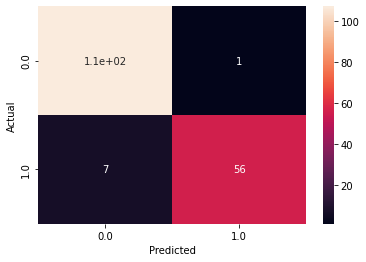

In [ ]:
sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
# Mengevaluasi akurasi metrik
from sklearn import metrics
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95
